<a href="https://colab.research.google.com/github/MarehWilliams01/ml_grp_assignments/blob/main/ml_gw_1%2C2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Heart Disease Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ml_assignments_600/group_work/heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **EDA**

Text(0, 0.5, 'Count')

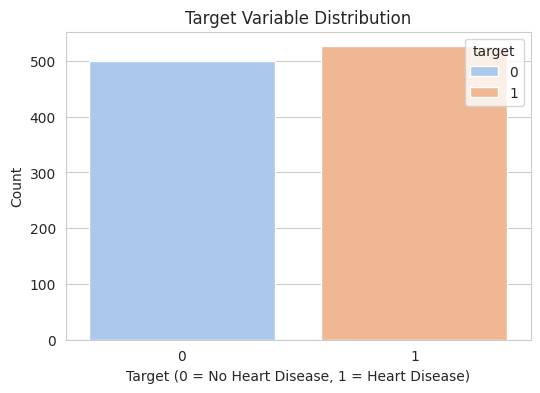

In [21]:
sns.set_style("whitegrid")

# 1. Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='pastel', hue='target')
plt.title('Target Variable Distribution')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')

Text(0.5, 1.02, 'Histograms of Continuous Numerical Features')

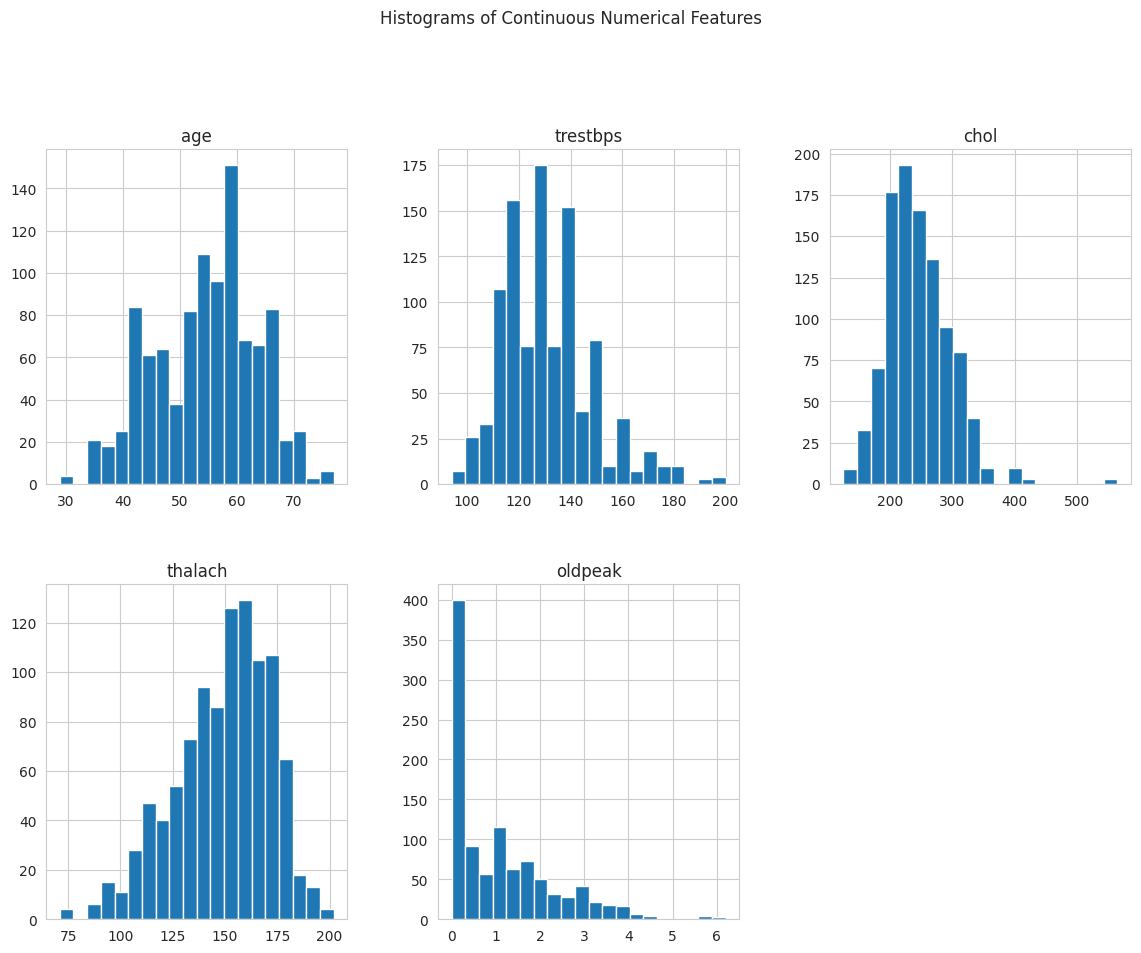

In [14]:
# 2. Numerical Feature Analysis
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].hist(bins=20, figsize=(14, 10), layout=(2, 3))
plt.suptitle('Histograms of Continuous Numerical Features', y=1.02)

Text(0.5, 1.0, 'Correlation Heatmap of All Features')

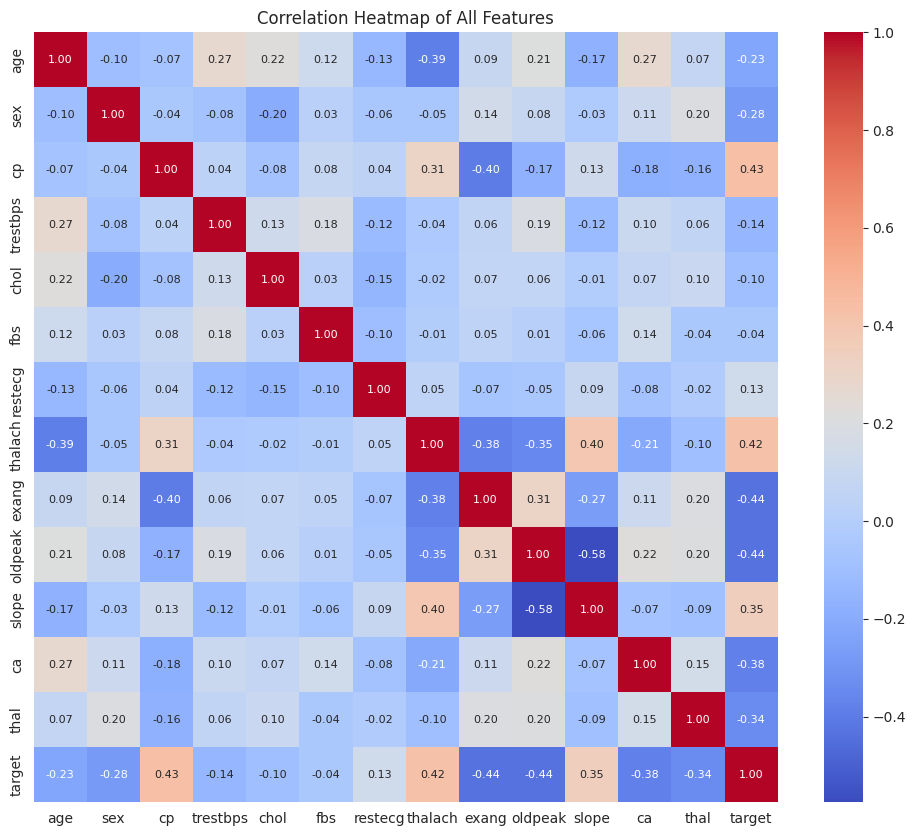

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap of All Features')

Text(0.5, 1.02, 'Count Plots of Categorical Features')

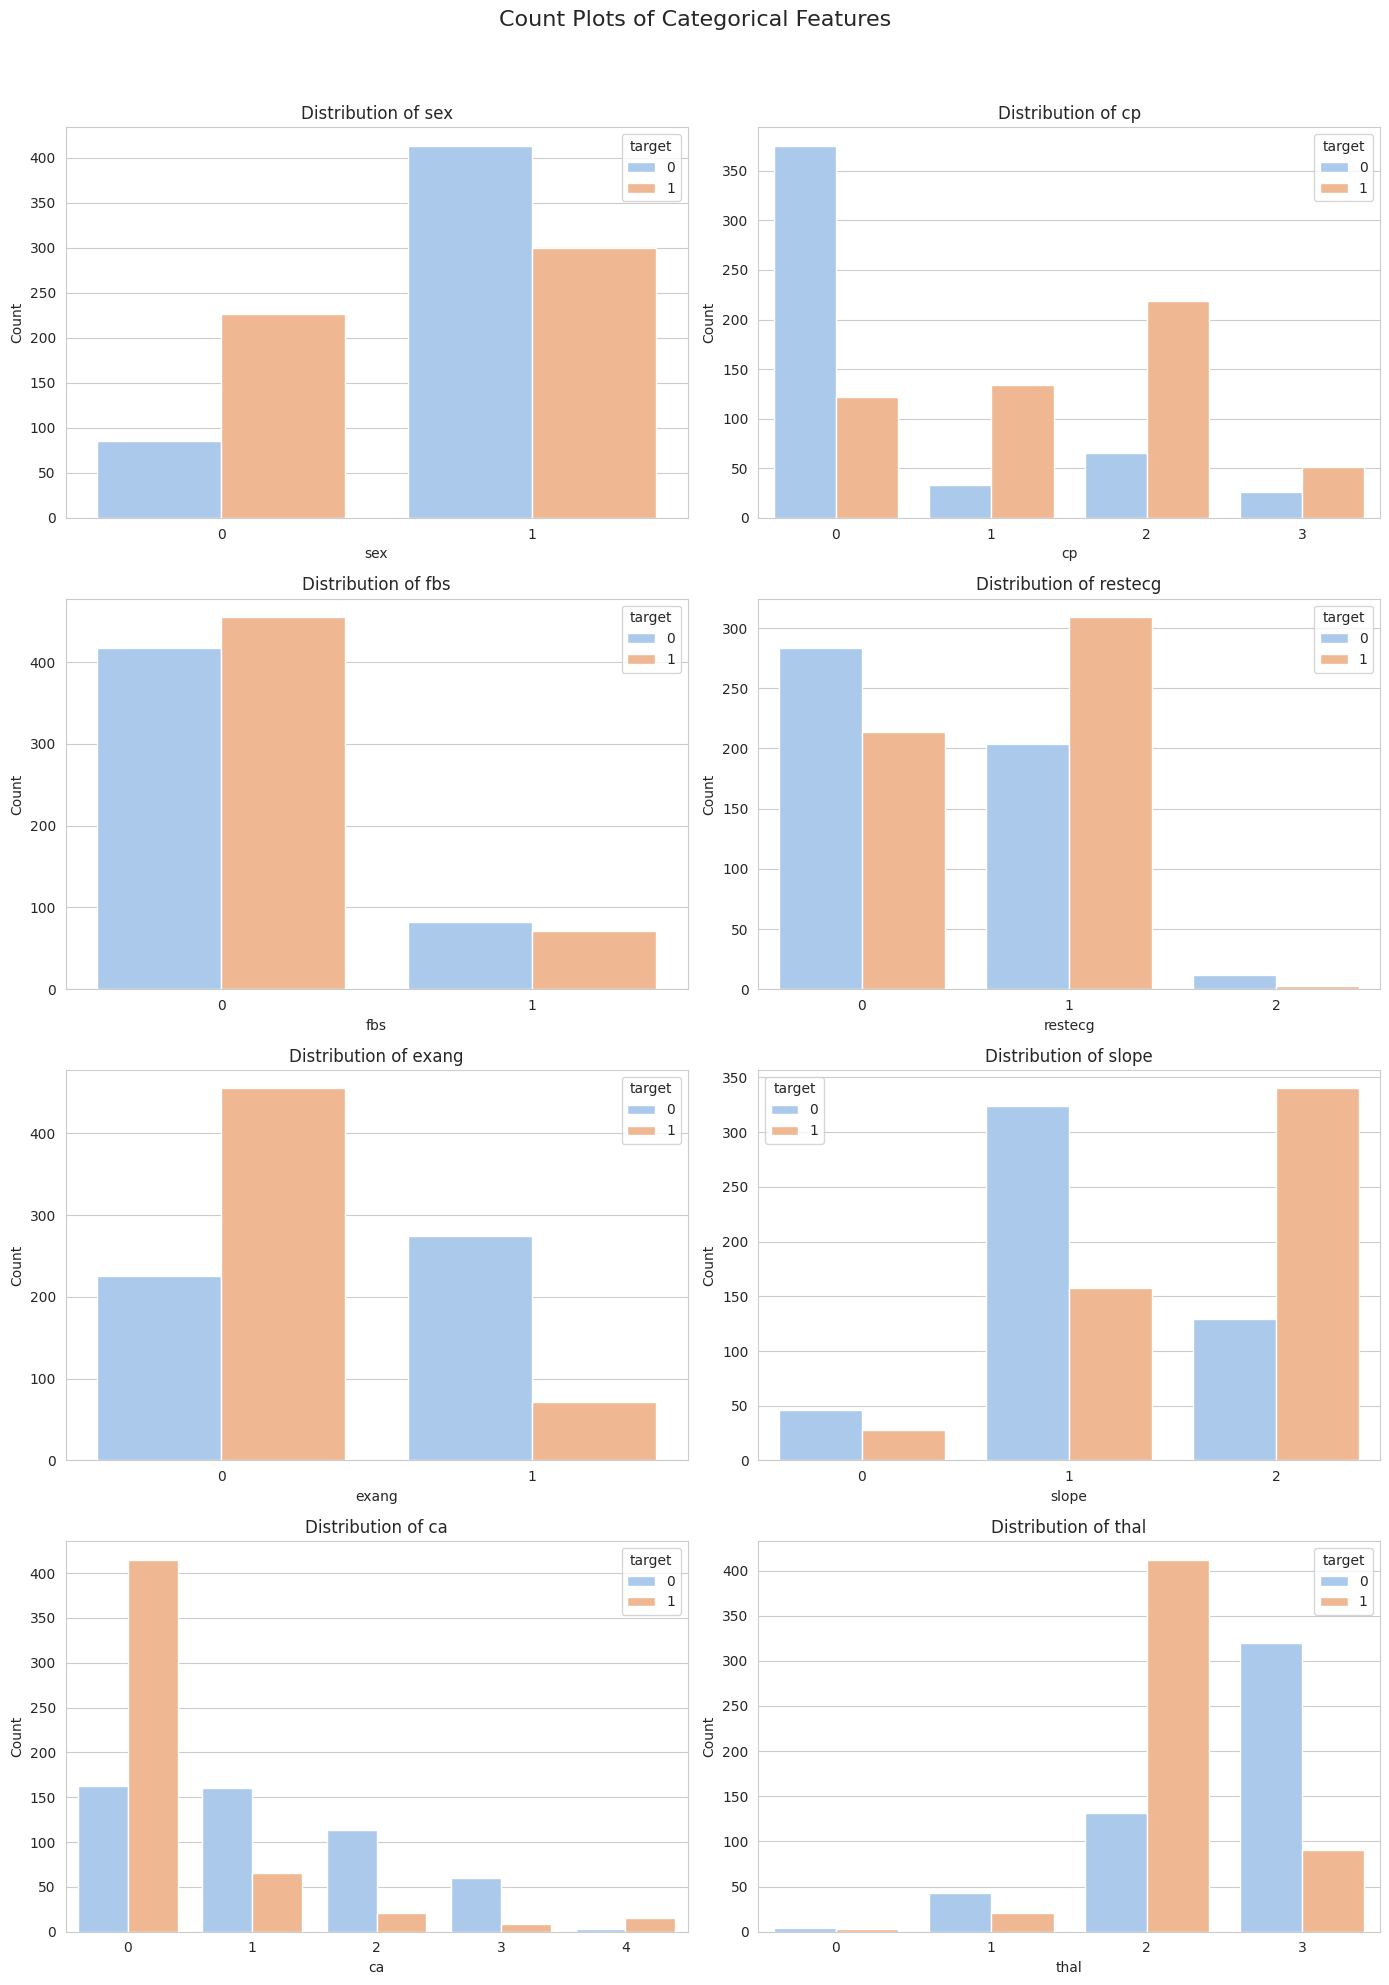

In [20]:
# 3. Categorical Feature Analysis
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel', hue='target')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make space for suptitle
plt.suptitle('Count Plots of Categorical Features', fontsize=16, y=1.02)

Text(0.5, 1.02, 'Numerical Features vs. Target')

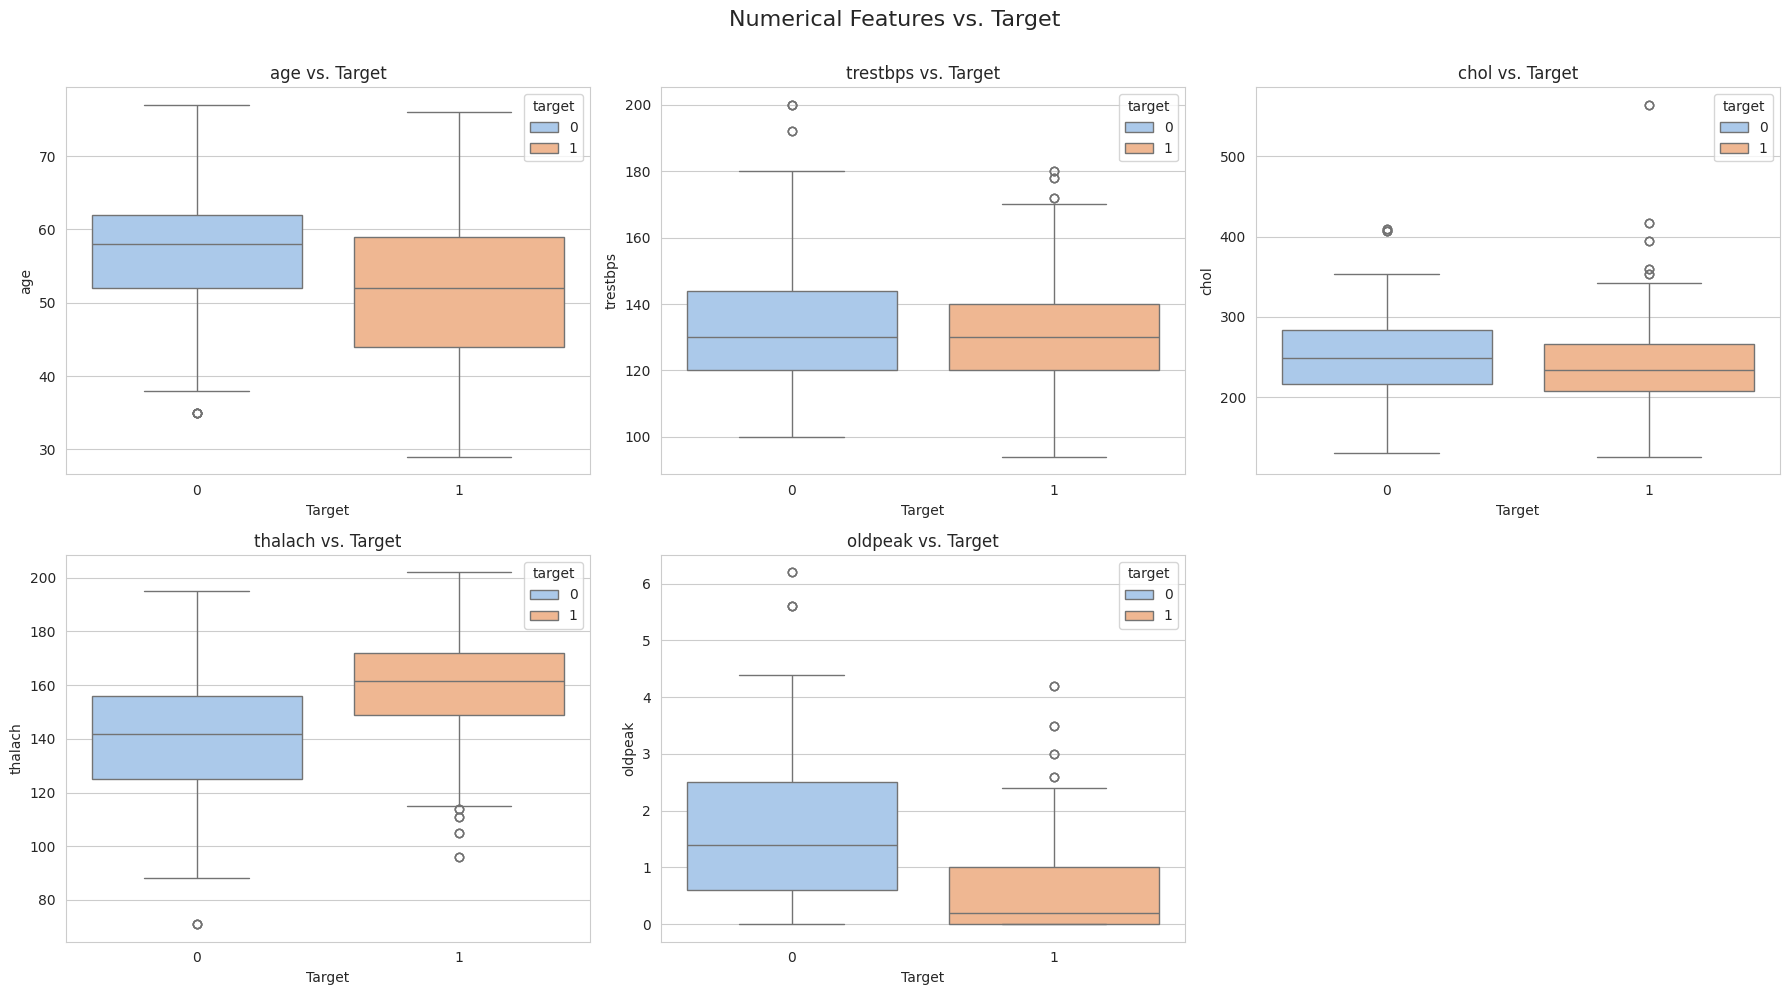

In [19]:
# 4. Bivariate Analysis (Features vs. Target)

# Box plots for numerical features vs. target
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x='target', y=col, data=df, ax=axes[i], palette='pastel', hue='target')
    axes[i].set_title(f'{col} vs. Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(col)

# Remove empty subplot if any
if len(numerical_features) < len(axes):
    for j in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.suptitle('Numerical Features vs. Target', fontsize=16, y=1.02)

Text(0.5, 1.02, 'Categorical Features vs. Target')

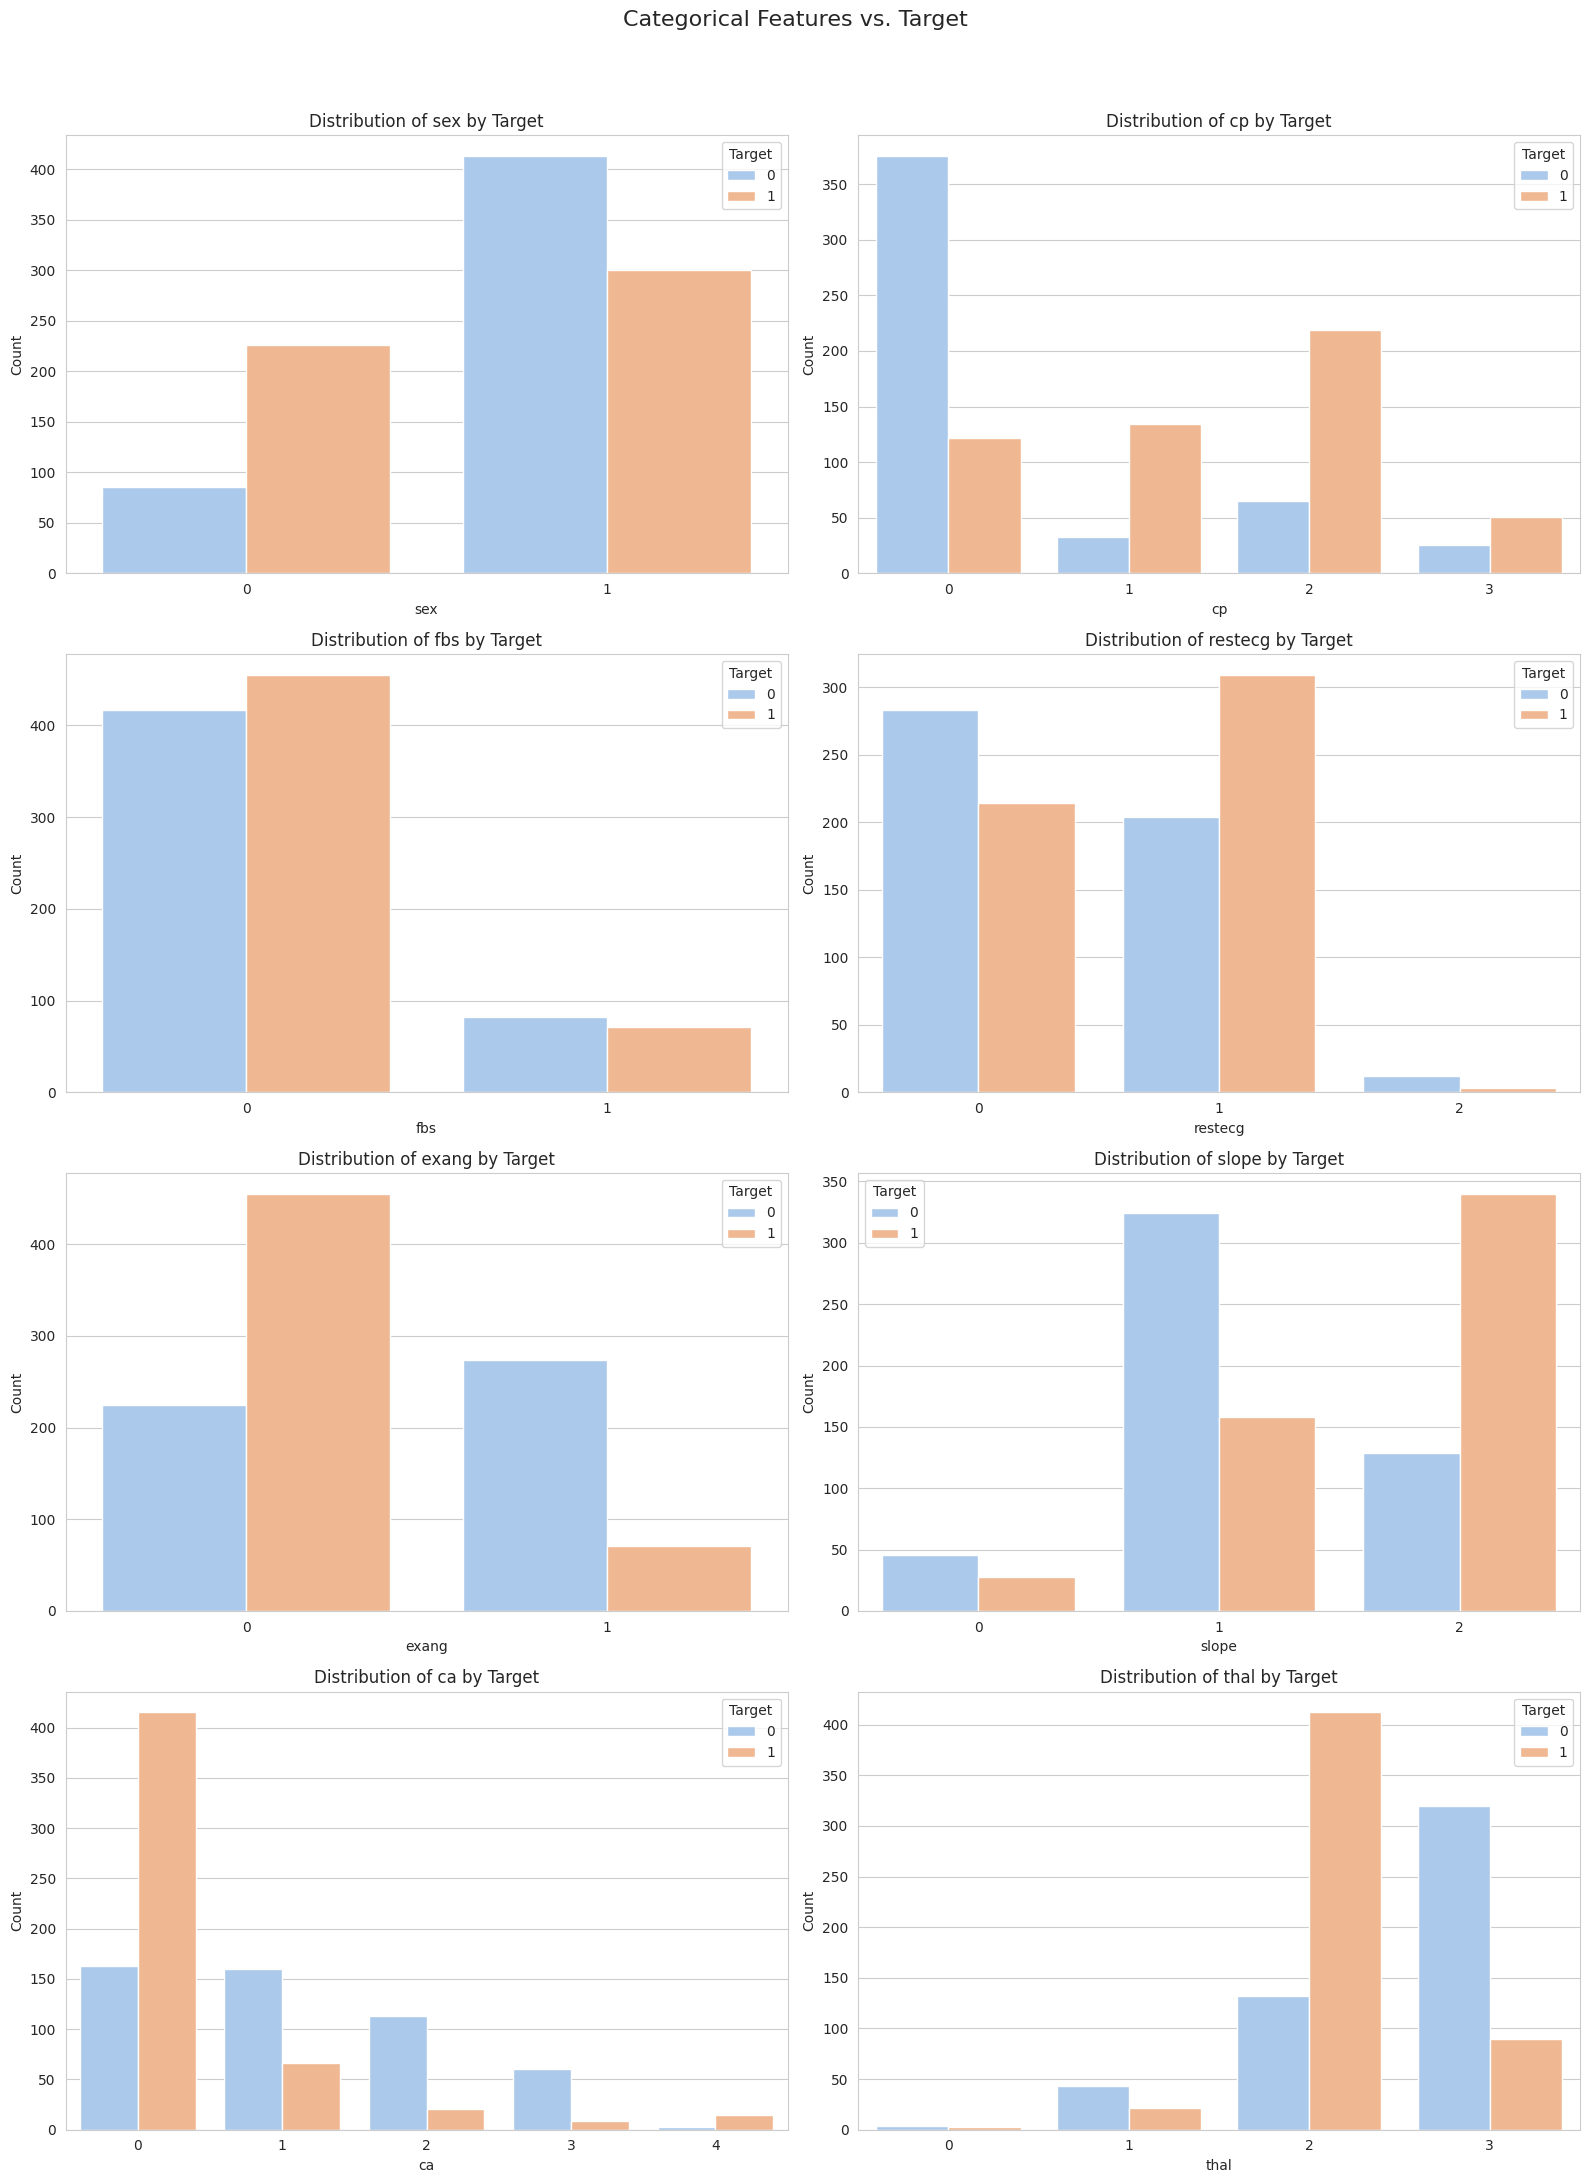

In [18]:
# Grouped count plots for categorical features vs. target
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 22))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel', hue='target')
    axes[i].set_title(f'Distribution of {col} by Target')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.suptitle('Categorical Features vs. Target', fontsize=16, y=1.02)

# **PREPROCESSING**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Define Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

In [23]:
#2. Train-Test Split
# We split the data *before* any preprocessing to prevent data leakage.
# We use stratify=y to ensure the train and test sets have a similar proportion of 'target' classes as the original data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Original shape: {X.shape}")
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Original shape: (1025, 13)
Training shape: (820, 13)
Testing shape: (205, 13)


In [24]:
# 3. Identify Columns for Scaling vs. Encoding
# List of columns that are continuous numbers
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# List of columns that are categorical
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 4. Preprocessing Pipeline
scaler = StandardScaler()

# This will convert categories like (cp=0, cp=1, cp=2) into binary columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combine these two transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, continuous_features),
        ('cat', encoder, categorical_features)
    ],
    remainder='passthrough'
)

In [28]:
X_train_processed = preprocessor.fit_transform(X_train)

X_test_processed = preprocessor.transform(X_test)

In [26]:
X_train_processed

array([[ 0.81162633,  0.31472862,  0.89579058, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15224695,  3.76764257,  0.77911537, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26214351, -0.24219298, -0.36819094, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.81162633,  1.53995615, -1.63217246, ...,  0.        ,
         0.        ,  1.        ],
       [-0.17744274, -0.52065378,  0.66244015, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70172977,  0.98303455, -0.09594877, ...,  0.        ,
         1.        ,  0.        ]])

In [27]:
X_test_processed

array([[ 1.03141946, -0.68773026, -0.03761116, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.26214351, -1.24465187, -0.91267529, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5918332 , -0.13080866, -0.81544594, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.15224695, -0.01942434, -1.24325507, ...,  1.        ,
         0.        ,  0.        ],
       [-0.06754618,  1.53995615, -0.91267529, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.04235038, -0.13080866,  0.27352276, ...,  0.        ,
         1.        ,  0.        ]])

In [29]:
# Get the new feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = continuous_features + list(ohe_feature_names)

# Convert processed arrays back to DataFrames
df_train_processed = pd.DataFrame(X_train_processed, columns=all_feature_names)
df_test_processed = pd.DataFrame(X_test_processed, columns=all_feature_names)

In [34]:
df_train_processed.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.811626,0.314729,0.895791,-1.921155,0.696525,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.152247,3.767643,0.779115,-0.725362,2.475810,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.262144,-0.242193,-0.368191,0.027545,-0.574393,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.262144,0.983035,-2.371116,1.046184,-0.743849,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.287339,0.203344,-1.009905,0.869030,-0.828577,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
df_test_processed.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1.031419,-0.687730,-0.037611,-2.364041,0.950709,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.262144,-1.244652,-0.912675,-1.035382,0.357614,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.591833,-0.130809,-0.815446,-0.769650,1.120164,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.262144,0.426113,-1.087688,-0.061032,-0.574393,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.921523,-1.356036,0.409644,0.869030,0.611797,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **OVERSAMPLING**

([<matplotlib.axis.XTick at 0x7b7bae1bd340>,
 [Text(0, 0, 'Class 0 (No Diabetes): 500'),
  Text(1, 0, 'Class 1 (Diabetes): 268')])

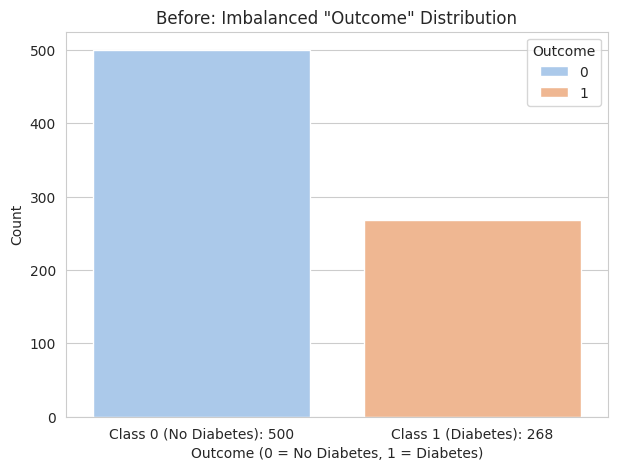

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

df = pd.read_csv("/content/drive/MyDrive/ml_assignments_600/group_work/diabetes.csv")

plt.figure(figsize=(7, 5))
sns.countplot(x='Outcome', data=df, palette='pastel', hue='Outcome')
plt.title('Before: Imbalanced "Outcome" Distribution')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
original_counts = df['Outcome'].value_counts()
plt.xticks(ticks=[0, 1], labels=[f'Class 0 (No Diabetes): {original_counts[0]}', f'Class 1 (Diabetes): {original_counts[1]}'])

In [45]:
# Separate majority and minority classes ---
df_majority = df[df.Outcome == 0]
df_minority = df[df.Outcome == 1]

# Apply Random Oversampling ---
# We will resample the minority class with replacement
df_minority_oversampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

In [46]:
# Combine the new oversampled minority df with the original majority df
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Show the "after" results
print("New oversampled dataset shape:", df_oversampled.shape)
print("New target distribution:")
print(df_oversampled['Outcome'].value_counts())

New oversampled dataset shape: (1000, 9)
New target distribution:
Outcome
0    500
1    500
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x7b7bae0a7200>,
 [Text(0, 0, 'Class 0: 500'), Text(1, 0, 'Class 1: 500')])

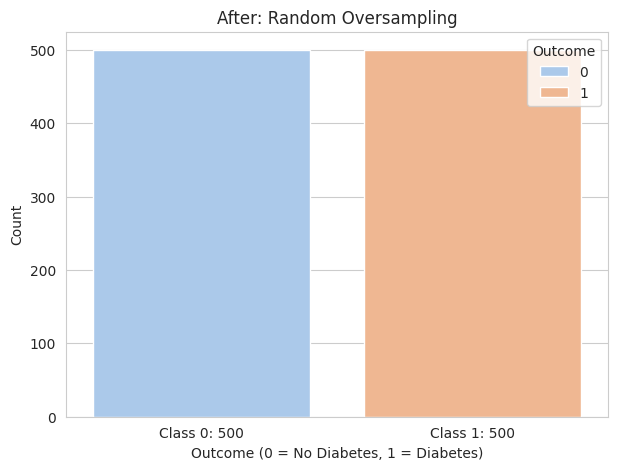

In [48]:
# Plot the new balanced distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Outcome', data=df_oversampled, palette='pastel', hue='Outcome')
plt.title('After: Random Oversampling')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
new_counts = df_oversampled['Outcome'].value_counts()
plt.xticks(ticks=[0, 1], labels=[f'Class 0: {new_counts[0]}', f'Class 1: {new_counts[1]}'])

# **FEATURE ENGINEERING**

In [55]:
# Binning BMI
bins_bmi = [0, 18.5, 25, 30, 100] # Bins for Underweight, Normal, Overweight, Obese
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['BMI_Category'] = pd.cut(df['BMI'], bins=bins_bmi, labels=labels_bmi, right=False)

df['BMI_Category']

,BMI_Category
0,Obese
1,Overweight
2,Normal
3,Overweight
4,Obese
...,...
763,Obese
764,Obese
765,Overweight
766,Obese


In [56]:
# Binning Age
bins_age = [0, 30, 40, 50, 60, 100]
labels_age = ['21-29', '30-39', '40-49', '50-59', '60+'] # Age starts at 21 in this dataset

df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)
df['Age_Group']

,Age_Group
0,50-59
1,30-39
2,30-39
3,21-29
4,30-39
...,...
763,60+
764,21-29
765,30-39
766,40-49
